
```
总结了PCA的基本原理，并分析实现代码。
```

## 是什么

提到**Principal component analysis (PCA) **，大家会先想到“降维”，其准确的定义是：

```
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components.
```

翻译： PCA是一种统计过程，它使用**正交变换**，将一系列可能相关的变量的观测转换到另外一系列的线性无关的变量，这些线性无关的变量称为**主成分**。

主成分分析经常用于减少数据集的维数，同时保持数据集中的对方差贡献最大的特征。这是通过保留低阶主成分，忽略高阶主成分做到的。

## 数学描述

参看[Goodfellow的《deep learning》](http://www.deeplearningbook.org/)。

假设我们有一系列的m个点${x^{(1)}, x^{(2)}, ..., x^{(m)}}$，其中$x^{(i)}∈R^n$。

回到问题的最初，我们想让数据降维，约束是什么呢？降维以后保留大部分原来的信息。如果将降维看做**编码**，那么约束就是**解码**后的结果尽量和源数据吻合。

假设对于每个点$x^{(i)}$，都可以找到一个**编码向量**与之对应，记为$c^{(i)}∈R^l,l<n$。定义一个**编码函数**：$f(x)=c$，一个**解码函数**：$g(c(x))$，约束即$x≈g(c(x))$。

PCA由我们**对解码函数的选择**来定义：即，**解码函数是一个矩阵乘法（线性变换）**，记为$g(c)=Dc$。$D∈R^{n×l}$。

为了进一步简化问题，PCA进一步限制D矩阵每对列向量两两正交（orthogonal）。

那么最优的编码方法：$c^* = \underset {c}{argmin}||x-Dc||^2_2 =\underset {c}{argmin}(x-Dc)^T(x-Dc)$。

最终化简为：$c^* = \underset {c}{argmin} -2x^TDc+c^Tc$，令$\bigtriangledown_c -2x^TDc+c^Tc = 0$，得到$c=D^Tx$。

于是得到PCA的重构函数：$r(x) = g(c(x)) = D^TDx$，接下来寻找这个D。

$D^*=\underset{D}{argmin} \sqrt {\sum_{i,j}(x^{(i)}_i-r(x^{(i)})_j)^2}$，约束是$D^TD=1$。

为了简化问题，先考虑l=1的情况，即只考虑一个向量$d$，问题转换成了$d^*=\underset{d}{argmin}\sum_i||x^{(i)}-dd^Tx^{(i)}||^2_2$，约束是$||d||_2 = 1$。

X是x堆成的矩阵，$d^*=\underset{d}{argmin}||X-dd^TX||^2_2$，化简成：$ \underset{d}{argmax} Tr(d^TX^TXd)$，约束是$d^Td=1$。

d的最优解是协方差矩阵$X^TX$最大的特征值对应的特征向量。

## 更直观的工作原理

[这篇博客](http://blog.codinglabs.org/articles/pca-tutorial.html)从另一个更直观的角度解释了PCA的原理。我也简单总结（摘抄）一下。

首先理解两个矩阵相乘的几何意义：将右边矩阵中的每一列列向量变换到左边矩阵中每一行行向量为基所表示的空间中去。

有一堆数据，我们希望重新投影，并且**希望投影后的投影值尽可能分散**。

上面的目标用数学语言描述就是：**将一组N维向量降为K维（K大于0，小于N），其目标是选择K个单位（模为1）正交基，使得原始数据变换到这组基上后，各字段两两间协方差为0，而字段的方差则尽可能大（在正交的约束下，取最大的K个方差）。**

**设我们有m个n维数据记录，将其按列排成n乘m的矩阵X，设$C=\frac{1}{m}XX^T$，则C是一个对称矩阵，其对角线分别个各个字段的方差，而第i行j列和j行i列元素相同，表示i和j两个字段的协方差。**

优化目前，等价于将协方差矩阵对角化：**即除对角线外的其它元素化为0，并且在对角线上将元素按大小从上到下排列，这样我们就达到了优化目的。**

设原始数据矩阵X对应的协方差矩阵为C，而P是一组基按行组成的矩阵，设Y=PX，则Y为X对P做基变换后的数据。设Y的协方差矩阵为D，推导一下D与C的关系：

$D=\frac{1}{m}YY^T=\frac{1}{m}(PX)(PX)^T=\frac{1}{m}PXX^TP^T=P(\frac{1}{m}XX^T)P^T=PCP^T$

要找的P不是别的，是能让原始协方差矩阵C对角化的P。

而C作为实对称矩阵又有一些很好的性质：

1）实对称矩阵不同特征值对应的特征向量必然正交。

2）设特征向量λ重数为r，则必然存在r个线性无关的特征向量对应于λ，因此可以将这r个特征向量单位正交化。

由上面两条可知，一个n行n列的实对称矩阵一定可以找到n个单位正交特征向量，设这n个特征向量为$e_1,e_2,⋯,e_n$，我们将其按列组成矩阵：
$E=(e_1\;e_2\;⋯ \;e_n)$
则对协方差矩阵C有如下结论：
$E^TCE=Λ$

因此，$P=E^T$，即P的一个解。

### 和SVD的关系

**奇异值分解（singular value decomposition）**：$A=UDV^T$，其中A是m×n矩阵；U是m×m正交矩阵，U的列向量称为左奇异向量，是$AA^T$的特征向量；D是m×n对角矩阵，对角线上的元素称为奇异值；V是正交n×n矩阵，V的列向量称为右奇异向量，是$A^TA$的特征向量。

因此一些算法直接借用SVD分解的结果来获取协方差矩阵的特征向量和特征值。

### PCA算法

设有m条n维数据。

1）将原始数据按列组成n行m列矩阵X

2）将X的每一行（代表一个属性字段）进行零均值化，即减去这一行的均值

3）求出协方差矩阵$C=\frac{1}{m}XX^T$

4）求出协方差矩阵的特征值及对应的特征向量

5）将特征向量按对应特征值大小从上到下按行排列成矩阵，取前k行组成矩阵P

6）Y=PX即为降维到k维后的数据

## 代码分析

给一个图像分析的代码做例子，代码来自[这里](https://book.douban.com/subject/25906843/)。

In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

def pca(X):
    """
    主成分分析
    输入：矩阵X，存储训练数据，每一行是对应一张图片；
    输出：投影矩阵（按照维度的重要性排序）/方差/均值。
    """
    # 获取维度
    num_data, dim = X.shape
    # 数据中心化
    mean_X = X.mean(axis=0)
    X = X - mean_X
    if dim > num_data:
        # PCA-使用紧致技巧
        M = np.dot(X, X.T)  # 协方差矩阵
        e, EV = np.linalg.eigh(M)  # 特征值和特征向量
        tmp = np.dot(X.T, EV).T  # 这就是紧致技巧
        V = tmp[::-1]  # 由于最后的特征向量才是我们需要的，所以需要逆序
        S = np.sqrt(e)[::-1]  # 由于特征值是按照递增顺序排列的，所以需要逆序
        for i in range(V.shape[1]):
            V[:, i]/=5
    else:
        # PCA-使用SVD方法
        U, S, V = np.linalg.svd(X)
        V = V[:num_data]  # 仅仅返回前num_data的数据
    # 返回投影矩阵/方差/均值
    return V, S, mean_X

In [2]:
import os
img_dir = "/home/cer/Data/pcv_data/data/a_thumbs"
imlist = [os.path.join(img_dir, one_path) for one_path in os.listdir(img_dir)]

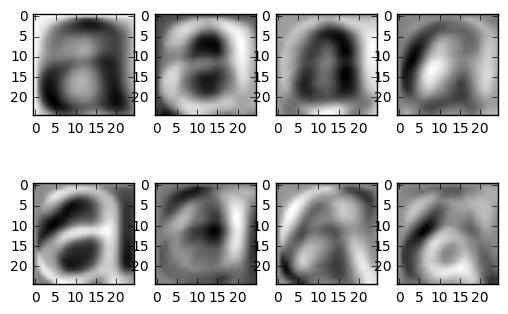

In [3]:
im = np.array(Image.open(imlist[0])) # 打开一幅图像，获取其大小
m,n = im.shape[0:2] # 获取图像的大小
imnbr = len(imlist) # 获取图像的数目

# 创建矩阵，保存所有压平后的图像数据
immatrix = np.array([np.array(Image.open(im)).flatten() for im in imlist],'f')

# 执行 PCA 操作
V,S,immean = pca(immatrix)

# 显示一些图像（均值图像和前 7 个模式）
plt.figure()

plt.gray()
plt.subplot(2,4,1)
plt.imshow(immean.reshape(m,n))
for i in range(7):
    plt.subplot(2,4,i+2)
    plt.imshow(V[i].reshape(m,n))

plt.show()

上面展示的是平均图像（左上第一幅）和前7个模式（具有最大方差的方向模式，不是降维的结果）

In [4]:
immatrix.shape

(2359, 625)